___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013,80000,83450,73000,16200
hp,66.0,141.0,85.0,66.0,66.0
previous_owners,2,1,1,1,1
make,Audi,Audi,Audi,Audi,Audi
model,A1,A1,A1,A1,A1
body_color,Black,Red,Black,Brown,Black


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15909 non-null  object 
 1   body_type        15909 non-null  object 
 2   price            15909 non-null  int64  
 3   vat              15909 non-null  object 
 4   km               15909 non-null  int64  
 5   hp               15909 non-null  float64
 6   previous_owners  15909 non-null  int64  
 7   make             15909 non-null  object 
 8   model            15909 non-null  object 
 9   body_color       15909 non-null  object 
 10  paint_type       15909 non-null  object 
 11  gearing_type     15909 non-null  object 
 12  displacement     15909 non-null  float64
 13  weight           15909 non-null  float64
 14  drive_chain      15909 non-null  object 
 15  fuel             15909 non-null  object 
 16  gears            15909 non-null  float64
 17  country_vers

In [5]:
df.describe()

,price,km,hp,previous_owners,displacement,weight,gears,cons_combined,cons_city,cons_country,age,co2_emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.00000,15909.000000,15909.000000,15909.000000
mean,18020.241876,31944.738010,88.470111,0.915331,1427.330065,1337.355082,5.937268,4.822094,5.92412,4.230684,1.488151,117.787542
std,7377.200813,37096.287953,26.585969,0.428063,276.215874,199.941904,0.704943,0.879165,1.82186,1.112278,1.034392,18.054790
min,4950.000000,0.000000,51.000000,0.000000,890.000000,840.000000,5.000000,3.000000,0.00000,0.000000,0.000000,45.000000
25%,12850.000000,1565.000000,66.000000,1.000000,1229.000000,1165.000000,5.000000,4.000000,5.00000,3.800000,1.000000,104.000000
50%,16900.000000,20407.000000,85.000000,1.000000,1461.000000,1288.000000,6.000000,4.800000,5.80000,4.200000,1.000000,117.000000
75%,21900.000000,46900.000000,101.000000,1.000000,1598.000000,1472.000000,6.000000,5.400000,6.80000,4.500000,2.000000,129.000000
max,74600.000000,317000.000000,294.000000,4.000000,2967.000000,2471.000000,8.000000,9.100000,66.00000,44.000000,3.000000,253.000000


In [9]:
df.km.idxmax()

9270

In [10]:
df.iloc[9270]

make_model                Opel Corsa
body_type                     Sedans
price                           8350
vat                   VAT deductible
km                            317000
hp                              66.0
previous_owners                    1
make                            Opel
model                          Corsa
body_color                       Red
paint_type                  Metallic
gearing_type                  Manual
displacement                  1398.0
weight                        1199.0
drive_chain                    front
fuel                          Benzin
gears                            5.0
country_version              Germany
cons_combined                    6.0
cons_city                        7.4
cons_country                     5.1
age                                2
upholstery_type                Cloth
co2_emission                   136.0
comfort             Air conditioning
extras             On-board computer
Name: 9270, dtype: object

In [11]:
#km std > mean ??

In [12]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp',
       'previous_owners', 'make', 'model', 'body_color', 'paint_type',
       'gearing_type', 'displacement', 'weight', 'drive_chain', 'fuel',
       'gears', 'country_version', 'cons_combined', 'cons_city',
       'cons_country', 'age', 'upholstery_type', 'co2_emission', 'comfort',
       'extras'],
      dtype='object')

## Feature Engineering

In [13]:
df.select_dtypes("object").head()

,make_model,body_type,vat,make,model,body_color,paint_type,gearing_type,drive_chain,fuel,country_version,upholstery_type,comfort,extras
0,Audi A1,Sedans,VAT deductible,Audi,A1,Black,Metallic,Automatic,front,Diesel,Germany,Cloth,Air conditioning,Bluetooth
1,Audi A1,Sedans,Price negotiable,Audi,A1,Red,Metallic,Automatic,front,Benzin,Germany,Cloth,Air conditioning,Bluetooth
2,Audi A1,Sedans,VAT deductible,Audi,A1,Black,Metallic,Automatic,front,Diesel,Germany,Cloth,Air conditioning,MP3
3,Audi A1,Sedans,VAT deductible,Audi,A1,Brown,Metallic,Automatic,front,Diesel,Germany,Cloth,Air suspension,Bluetooth
4,Audi A1,Sedans,VAT deductible,Audi,A1,Black,Metallic,Automatic,front,Diesel,Germany,Cloth,Air conditioning,Bluetooth


In [14]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 8
body_type           : 9
vat                 : 2
make                : 3
model               : 8
body_color          : 13
paint_type          : 3
gearing_type        : 3
drive_chain         : 3
fuel                : 3
country_version     : 23
upholstery_type     : 2
comfort             : 20
extras              : 9


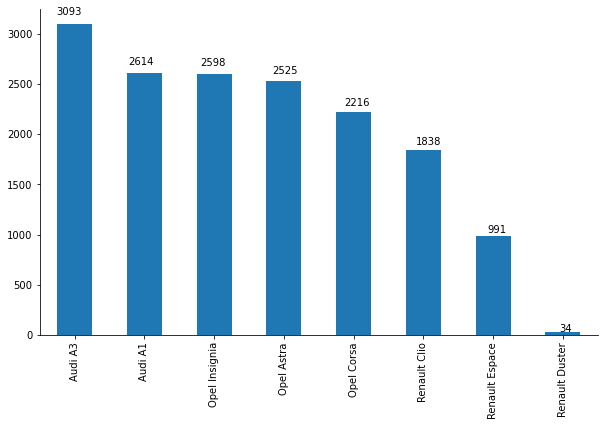

In [15]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [16]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,hp,previous_owners,make,model,body_color,paint_type,gearing_type,displacement,weight,drive_chain,fuel,gears,country_version,cons_combined,cons_city,cons_country,age,upholstery_type,co2_emission,comfort,extras


In [17]:
df.drop(index = [2614], inplace = True)

In [18]:
df.shape

(15908, 26)

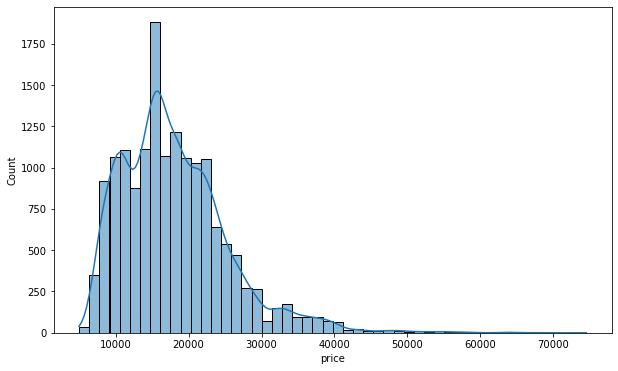

In [19]:
sns.histplot(df.price, bins = 50, kde=True);

In [23]:
df.price.idxmax()

3643

In [24]:
df.iloc[3643]

make_model                   Audi A3
body_type                    Compact
price                          67600
vat                   VAT deductible
km                             37747
hp                             294.0
previous_owners                    1
make                            Audi
model                             A3
body_color                     White
paint_type                  Metallic
gearing_type          Semi-automatic
displacement                  2480.0
weight                        1485.0
drive_chain                      4WD
fuel                          Benzin
gears                            7.0
country_version          Netherlands
cons_combined                    8.3
cons_city                       11.3
cons_country                     6.6
age                                2
upholstery_type    Part/Full Leather
co2_emission                   189.0
comfort             Air conditioning
extras                     CD player
Name: 3644, dtype: object

In [20]:
skew(df.price)

1.2368422521321827

In [21]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,hp,previous_owners,displacement,weight,gears,cons_combined,cons_city,cons_country,age,co2_emission
0,15770,56013,66.0,2,1422.0,1220.0,7.0,3.8,4.3,3.5,3,99.0
1,14500,80000,141.0,1,1798.0,1255.0,7.0,5.6,7.1,4.7,2,129.0
2,14640,83450,85.0,1,1598.0,1135.0,7.0,3.8,4.4,3.4,3,99.0
3,14500,73000,66.0,1,1422.0,1195.0,6.0,3.8,4.3,3.5,3,99.0
4,16790,16200,66.0,1,1422.0,1135.0,7.0,4.1,4.6,3.8,3,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,0,147.0,1,1997.0,1758.0,6.0,5.3,6.2,4.7,1,139.0
15905,39885,9900,165.0,1,1798.0,1708.0,7.0,6.8,8.7,5.7,0,168.0
15906,39875,15,146.0,1,1997.0,1734.0,6.0,5.3,6.2,4.7,0,139.0
15907,39700,10,147.0,1,1997.0,1758.0,6.0,5.3,6.2,4.7,0,139.0


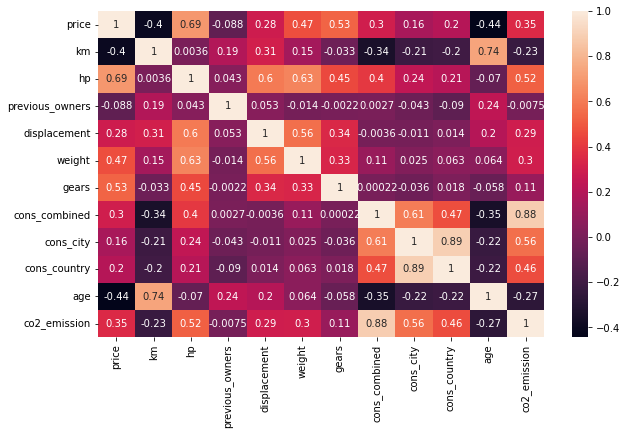

In [26]:
sns.heatmap(df_numeric.corr(), annot=True);

## multicollinearity control

In [32]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [28]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

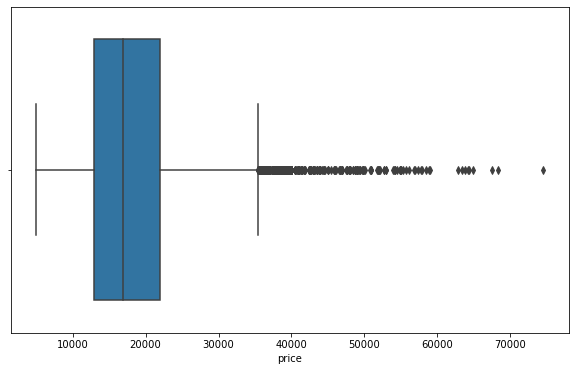

In [29]:
sns.boxplot(df.price);

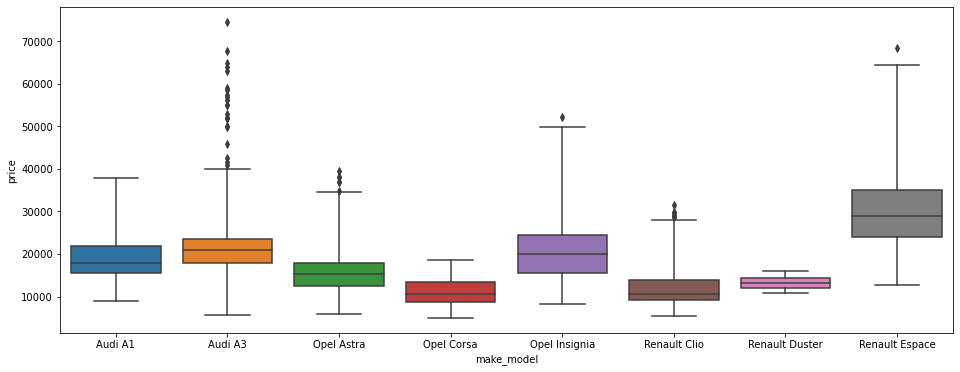

In [33]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [35]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'make', 'model', 'body_color',
       'paint_type', 'gearing_type', 'drive_chain', 'fuel', 'country_version',
       'upholstery_type', 'comfort', 'extras'],
      dtype='object')

In [36]:
df = df.join(df["comfort"].str.get_dummies(sep = ",").add_prefix("cc_"))
#df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
#df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [37]:
df.drop(["comfort", "extras"], axis=1, inplace=True)

In [39]:
df = pd.get_dummies(df, drop_first =True)

In [40]:
df.head()

,price,km,hp,previous_owners,displacement,weight,gears,cons_combined,cons_city,cons_country,age,co2_emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Auxiliary heating,cc_Cruise control,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Leather steering wheel,cc_Light sensor,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Power windows,cc_Rain sensor,cc_Sunroof,ex_Bluetooth,ex_CD player,ex_Digital radio,ex_Hands-free equipment,ex_MP3,ex_On-board computer,ex_Radio,ex_Sound system,ex_USB,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,make_Opel,make_Renault,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_Gas,country_version_Belgium,country_version_Bulgaria,country_version_Croatia,country_version_Czech Republic,country_version_Denmark,country_version_Egypt,country_version_European Union,country_version_France,country_version_Germany,country_version_Hungary,country_version_Italy,country_version_Japan,country_version_Luxembourg,country_version_Netherlands,country_version_Poland,country_version_Romania,country_version_Serbia,country_version_Slovakia,country_version_Slovenia,country_version_Spain,country_version_Sweden,country_version_Switzerland,upholstery_type_Part/Full Leather
0,15770,56013,66.0,2,1422.0,1220.0,7.0,3.8,4.3,3.5,3,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14500,80000,141.0,1,1798.0,1255.0,7.0,5.6,7.1,4.7,2,129.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14640,83450,85.0,1,1598.0,1135.0,7.0,3.8,4.4,3.4,3,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14500,73000,66.0,1,1422.0,1195.0,6.0,3.8,4.3,3.5,3,99.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16790,16200,66.0,1,1422.0,1135.0,7.0,4.1,4.6,3.8,3,109.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df.shape

(15908, 109)

In [24]:
df.shape

(15915, 134)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15908 entries, 0 to 15908
Columns: 109 entries, price to upholstery_type_Part/Full Leather
dtypes: float64(8), int64(33), uint8(68)
memory usage: 6.6 MB


In [43]:
df.isnull().any().any()

False

In [44]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                 -0.443010
gearing_type_Manual                 -0.431790
km                                  -0.401116
model_Corsa                         -0.379498
make_model_Opel Corsa               -0.379498
model_Clio                          -0.297812
make_model_Renault Clio             -0.297812
make_Opel                           -0.204794
drive_chain_front                   -0.155905
make_model_Opel Astra               -0.128352
model_Astra                         -0.128352
previous_owners                     -0.087778
body_color_Red                      -0.079646
ex_On-board computer                -0.079242
body_color_Silver                   -0.071824
body_type_Other                     -0.069385
cc_Cruise control                   -0.067078
cc_Electrical side mirrors          -0.061877
country_version_Italy               -0.060495
body_color_White                    -0.059123
ex_MP3                              -0.058481
country_version_Spain             

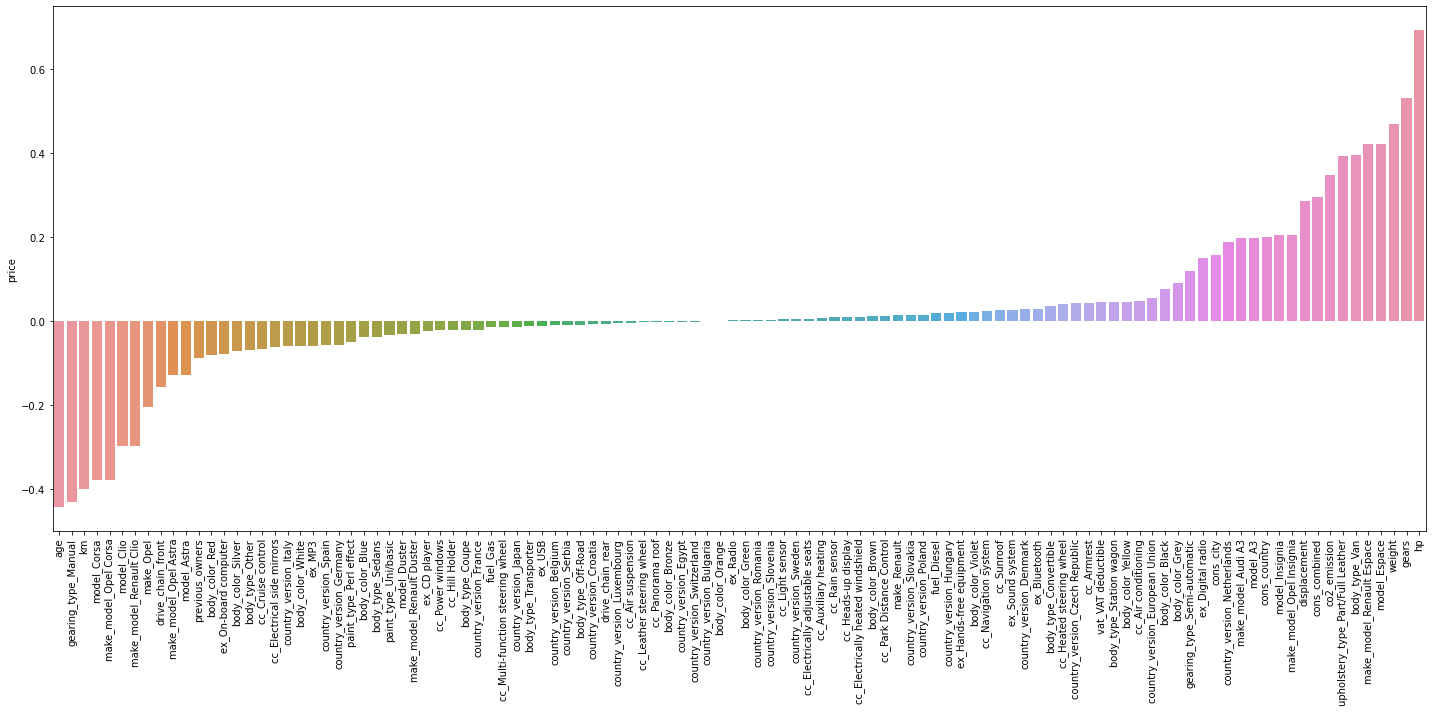

In [45]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [46]:
X = df.drop("price", axis =1)
y = df["price"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
X_train.shape

(11135, 108)

In [49]:
X_test.shape

(4773, 108)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [50]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [51]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = lm.predict(X_test)

In [54]:
y_train_pred = lm.predict(X_train)

In [55]:
pd.options.display.float_format = '{:.3f}'.format

In [56]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.863,0.864
mae,1882.656,1895.201
mse,7484424.775,7353769.848
rmse,2735.768,2711.784


## Cross Validate

In [57]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [58]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.266,0.018,0.862,-1963.179,-7906293.324,-2811.813
1,0.082,0.006,0.860,-1913.833,-7524943.730,-2743.163
2,0.080,0.007,0.862,-1822.767,-7354316.518,-2711.884
3,0.075,0.008,0.861,-1910.243,-8632648.325,-2938.137
4,0.061,0.005,0.861,-1890.302,-7365723.770,-2713.987
5,0.060,0.005,0.862,-1905.816,-7611176.440,-2758.836
6,0.064,0.005,0.863,-1851.720,-6621256.036,-2573.180
7,0.049,0.004,0.841,-2020.995,-9531437.922,-3087.303
8,0.051,0.005,0.871,-1815.706,-6575823.364,-2564.337
9,0.061,0.005,0.844,-1958.448,-7815904.639,-2795.694


In [59]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.859
test_neg_mean_absolute_error          -1905.301
test_neg_mean_squared_error        -7693952.407
test_neg_root_mean_squared_error      -2769.833
dtype: float64

In [60]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8644143299189825
MAE 		: 1895.200837063586
MSE 		: 7353769.847613154
RMSE 		: 2711.783517837136


In [61]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Prediction Error

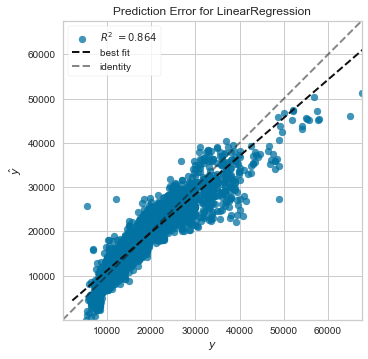

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [63]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

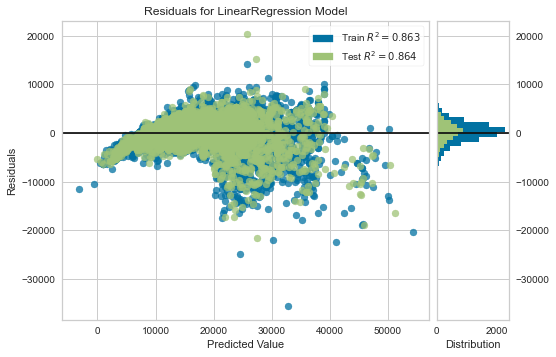

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [65]:
df.price.mean()

18020.68990445059

In [66]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [67]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
9596,9500,10374.716,-874.716
5600,22590,21303.288,1286.712
5906,14490,13873.471,616.529
14730,11490,13686.115,-2196.115
10156,10418,13033.414,-2615.414
13307,11990,11733.576,256.424
15379,30500,33403.753,-2903.753
12713,27228,26394.315,833.685
7922,17714,15699.398,2014.602
9482,14590,14054.203,535.797


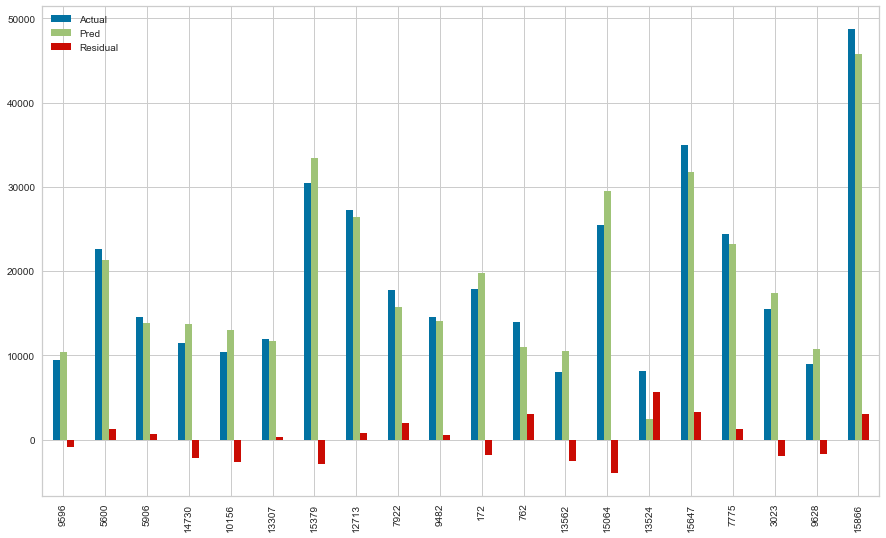

In [68]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [69]:
pd.DataFrame(lm.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-4677.849
model_Duster,-4677.849
cc_Panorama roof,-4033.364
drive_chain_rear,-3438.941
drive_chain_front,-2696.411
cc_Electrically adjustable seats,-2671.693
make_Renault,-2622.283
make_Opel,-2114.604
body_type_Off-Road,-2044.677
age,-1938.103


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [70]:
scaler = MinMaxScaler()

In [71]:
scaler.fit(X_train)

MinMaxScaler()

In [72]:
X_train = scaler.transform(X_train)

In [73]:
X_test = scaler.transform(X_test)

## Ridge

In [74]:
from sklearn.linear_model import Ridge, RidgeCV

In [75]:
ridge_model = Ridge()

In [76]:
ridge_model.fit(X_train, y_train)

Ridge()

In [77]:
y_pred = ridge_model.predict(X_test)

In [78]:
y_train_pred = ridge_model.predict(X_train)

In [79]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.862,0.864
mae,1885.829,1899.201
mse,7500288.623,7374108.758
rmse,2738.665,2715.531


## Finding best alpha for Ridge

In [116]:
alpha_space = np.linspace(0.01, 10, 10) #alpha 0 dememeli o zaman lr yapar
alpha_space

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [117]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [118]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [119]:
ridge_cv_model.alpha_

1.12

In [120]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [122]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.862,0.864
mae,1886.122,1899.533
mse,7502444.203,7376712.484
rmse,2739.059,2716.010


In [123]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [124]:
pd.DataFrame(ridge_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-13351.110
age,-5904.007
model_Duster,-4078.583
make_model_Renault Duster,-4078.583
cons_city,-3801.897
drive_chain_front,-2651.396
make_Renault,-2294.553
drive_chain_rear,-2153.629
make_Opel,-2143.089
displacement,-2067.236


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [125]:
from sklearn.linear_model import Lasso, LassoCV

In [126]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [127]:
y_train_pred = lasso_model.predict(X_train)

In [128]:
y_pred = lasso_model.predict(X_test)

In [129]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.862,0.864
mae,1892.361,1903.386
mse,7538114.732,7393199.121
rmse,2745.563,2719.044


## Finding best alpha for Lasso

In [130]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [131]:
lasso_cv_model.alpha_

1.12

In [132]:
y_train_pred = lasso_cv_model.predict(X_train)

In [133]:
y_pred = lasso_cv_model.predict(X_test)

In [134]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.862,0.864
mae,1892.946,1903.939
mse,7542430.444,7396596.517
rmse,2746.349,2719.668


In [135]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [136]:
pd.DataFrame(lasso_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-13436.347
make_model_Renault Duster,-8436.250
age,-5890.755
make_model_Renault Clio,-4637.839
make_model_Opel Corsa,-3968.532
drive_chain_front,-2394.485
make_model_Opel Astra,-2281.993
displacement,-2126.970
make_Opel,-1468.555
gearing_type_Manual,-1129.925


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [137]:
from sklearn.linear_model import ElasticNet

In [138]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [139]:
y_train_pred = elastic_model.predict(X_train)

In [140]:
y_pred = elastic_model.predict(X_test)

In [141]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.474,0.465
mae,3900.519,3892.593
mse,28672663.528,28990021.175
rmse,5354.686,5384.238


In [ ]:
# sonuclarin dusme sebebi: 

## Finding best alpha and l1_ratio for ElasticNet

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
elastic_model = ElasticNet()

In [144]:
param_grid = {'alpha':[1, 2.03, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [145]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [146]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.03, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [147]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=1)

In [148]:
y_train_pred = grid_model.predict(X_train)

In [149]:
y_pred = grid_model.predict(X_test)

In [150]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.862,0.864
mae,1892.361,1903.386
mse,7538114.732,7393199.121
rmse,2745.563,2719.044


In [151]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

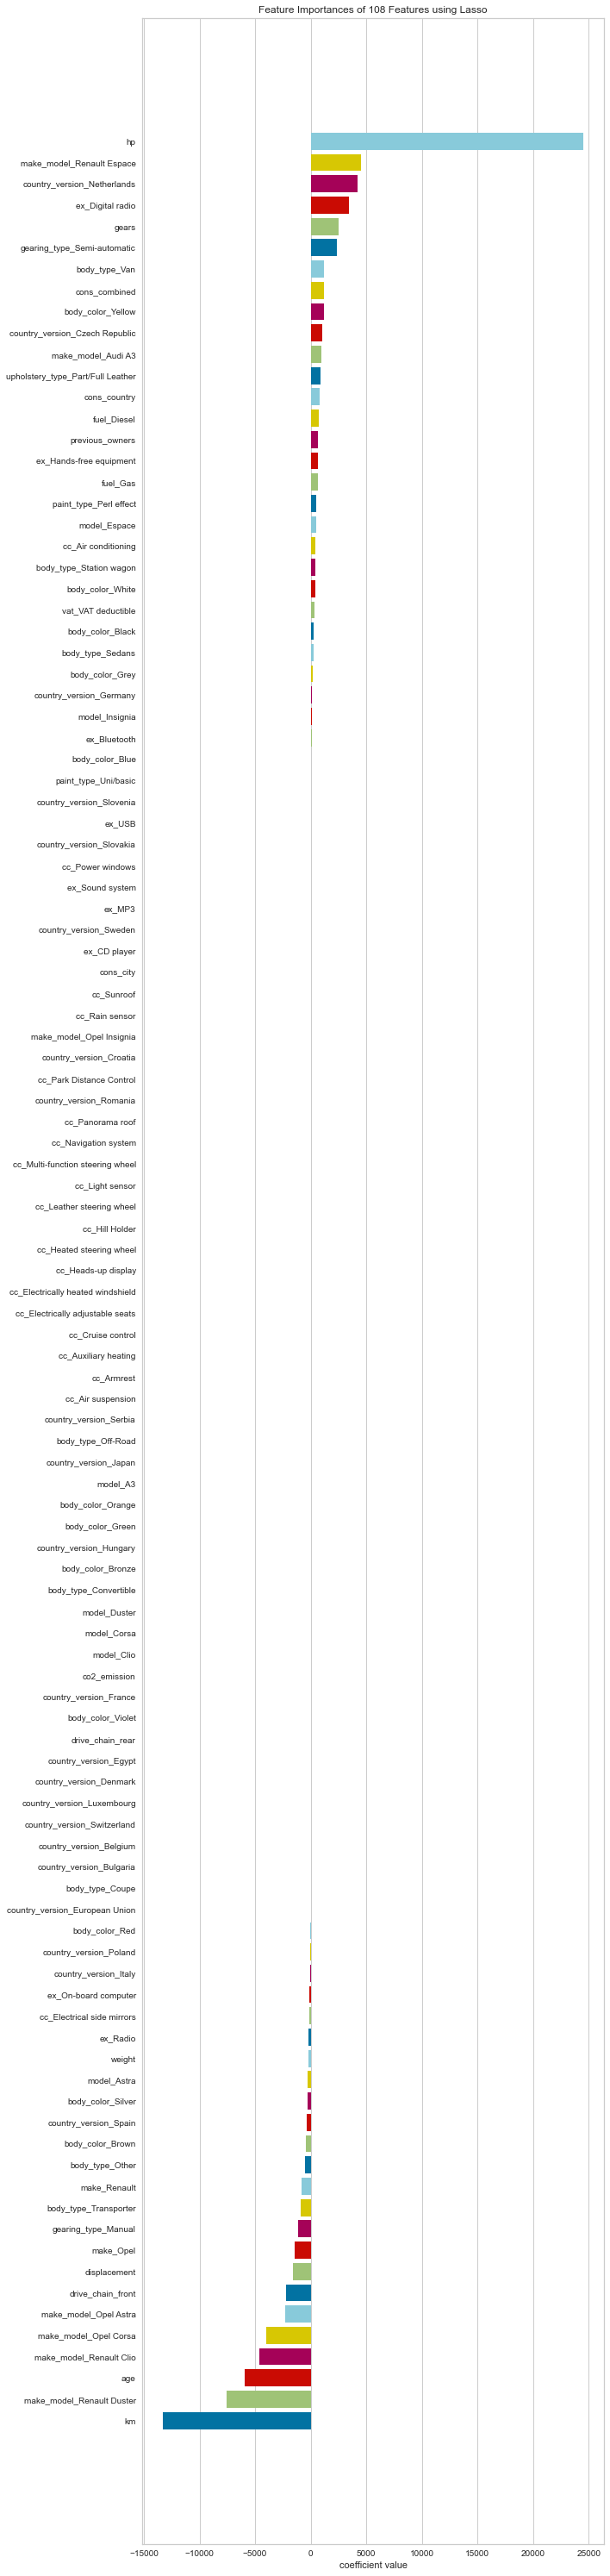

<AxesSubplot:title={'center':'Feature Importances of 108 Features using Lasso'}, xlabel='coefficient value'>

In [152]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=2.03), labels=df.drop(columns="price").columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [153]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [154]:
df.head()

,make_model,body_type,price,vat,km,hp,previous_owners,make,model,body_color,paint_type,gearing_type,displacement,weight,drive_chain,fuel,gears,country_version,cons_combined,cons_city,cons_country,age,upholstery_type,co2_emission,comfort,extras
0,Audi A1,Sedans,15770,VAT deductible,56013,66.000,2,Audi,A1,Black,Metallic,Automatic,1422.000,1220.000,front,Diesel,7.000,Germany,3.800,4.300,3.500,3,Cloth,99.000,Air conditioning,Bluetooth
1,Audi A1,Sedans,14500,Price negotiable,80000,141.000,1,Audi,A1,Red,Metallic,Automatic,1798.000,1255.000,front,Benzin,7.000,Germany,5.600,7.100,4.700,2,Cloth,129.000,Air conditioning,Bluetooth
2,Audi A1,Sedans,14640,VAT deductible,83450,85.000,1,Audi,A1,Black,Metallic,Automatic,1598.000,1135.000,front,Diesel,7.000,Germany,3.800,4.400,3.400,3,Cloth,99.000,Air conditioning,MP3
3,Audi A1,Sedans,14500,VAT deductible,73000,66.000,1,Audi,A1,Brown,Metallic,Automatic,1422.000,1195.000,front,Diesel,6.000,Germany,3.800,4.300,3.500,3,Cloth,99.000,Air suspension,Bluetooth
4,Audi A1,Sedans,16790,VAT deductible,16200,66.000,1,Audi,A1,Black,Metallic,Automatic,1422.000,1135.000,front,Diesel,7.000,Germany,4.100,4.600,3.800,3,Cloth,109.000,Air conditioning,Bluetooth


In [155]:
df_new = df[["make_model", "hp", "km","age", "price", "gearing_type"]]

In [156]:
df_new

,make_model,hp,km,age,price,gearing_type
0,Audi A1,66.000,56013,3,15770,Automatic
1,Audi A1,141.000,80000,2,14500,Automatic
2,Audi A1,85.000,83450,3,14640,Automatic
3,Audi A1,66.000,73000,3,14500,Automatic
4,Audi A1,66.000,16200,3,16790,Automatic
...,...,...,...,...,...,...
15904,Renault Espace,147.000,0,1,39950,Automatic
15905,Renault Espace,165.000,9900,0,39885,Automatic
15906,Renault Espace,146.000,15,0,39875,Automatic
15907,Renault Espace,147.000,10,0,39700,Automatic


In [157]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make_model    15909 non-null  object 
 1   hp            15909 non-null  float64
 2   km            15909 non-null  int64  
 3   age           15909 non-null  int64  
 4   price         15909 non-null  int64  
 5   gearing_type  15909 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 745.9+ KB


In [158]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp,km,age,price,gearing_type


In [159]:
df_new.drop(index=[2614], inplace =True)

In [160]:
df_new = pd.get_dummies(df_new)

In [161]:
df_new

,hp,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,66.000,56013,3,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000,2,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450,3,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000,3,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200,3,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,147.000,0,1,39950,0,0,0,0,0,0,0,1,1,0,0
15905,165.000,9900,0,39885,0,0,0,0,0,0,0,1,1,0,0
15906,146.000,15,0,39875,0,0,0,0,0,0,0,1,1,0,0
15907,147.000,10,0,39700,0,0,0,0,0,0,0,1,1,0,0


In [162]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [164]:
scaler = MinMaxScaler()

In [165]:
scaler.fit(X_train)

MinMaxScaler()

In [166]:
X_train = scaler.transform(X_train)

In [167]:
X_test = scaler.transform(X_test)

In [168]:
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)

In [169]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
        cv=10, max_iter=100000)

In [170]:
lasso_final_model.alpha_

0.01

In [171]:
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)

In [172]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.837,0.838
mae,2052.054,2055.522
mse,8897929.518,8768746.851
rmse,2982.940,2961.207


In [173]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [174]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.864,1895.201,2711.784
ridge_m,0.864,1899.533,2716.010
lasso_m,0.864,1903.939,2719.668
elastic_m,0.864,1903.386,2719.044
final_m,0.838,2055.522,2961.207


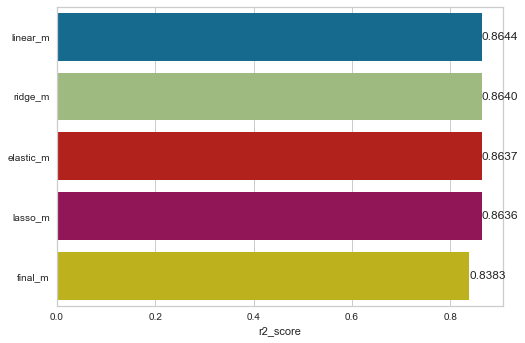

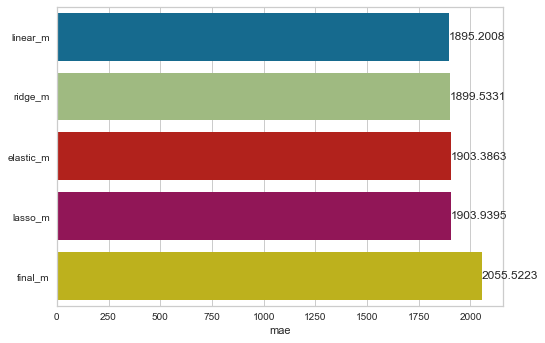

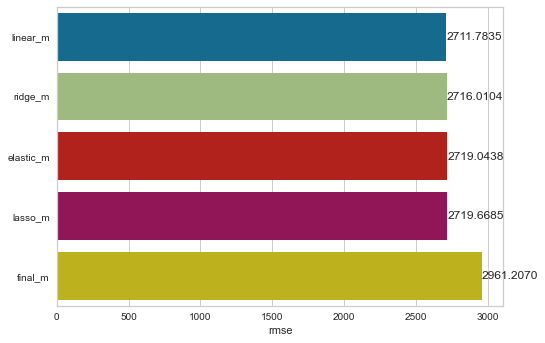

In [175]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [176]:
columns_name = X.columns

In [177]:
final_scaler = MinMaxScaler()

In [178]:
final_scaler.fit(X)

MinMaxScaler()

In [179]:
X = final_scaler.transform(X)

In [180]:
lasso_final_model = Lasso(alpha=0.01)

In [181]:
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [190]:
my_dict = {
    "hp": 81,
    "age": 1,
    "km": 10000,
    "make_model": 'Audi A3',
    "gearing_type": "Automatic"
}

In [191]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp,age,km,make_model,gearing_type
0,81,1,10000,Audi A3,Automatic


In [192]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp,age,km,make_model_Audi A3,gearing_type_Automatic
0,81,1,10000,1,1


In [193]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

,hp,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,81,10000,1,0,1,0,0,0,0,0,0,1,0,0


In [194]:
df_new.head()

,hp,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,66.000,56013,3,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000,2,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450,3,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000,3,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200,3,16790,1,0,0,0,0,0,0,0,1,0,0


In [195]:
my_dict = final_scaler.transform(my_dict)

In [196]:
my_dict

array([[0.12345679, 0.03154574, 0.33333333, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [197]:
lasso_final_model.predict(my_dict)

array([23040.63837862])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___